**Bojan Gjokjevski**

| part A |
| --- | 

# Lab | Cleaning Numerical Data

In [1]:
# 1. Import the necessary libraries.

import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None) # pandas settings: display all columns

In [3]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
# First look at its main features (head, shape, info). NOTE: The target column is total_claim_amount

display(customer)
customer.info()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# 4. Rename the columns so they follow the PE8 (snake_case)

print(customer.columns)

colm_name = []
for i in range(len(customer.columns)):
    colm_name.append(customer.columns[i].lower().replace(' ', '_'))
customer.columns = colm_name

# small correction in one of the column name(s) 

customer = customer.rename(columns = {'employmentstatus':'employment_status'})

customer.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
# 5. Change 'effective to date' column to datetime format.

customer['effective_to_date'].dtypes
customer['effective_to_date'] = pd.to_datetime(customer['effective_to_date'], dayfirst=True,format='%m/%d/%y')
customer.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [7]:
# 6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

numerical_df = customer.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
customer.select_dtypes(object)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [9]:
# 7. Define a function that differentiates between continuous and discrete variables.

# Hint: The number of unique values might be useful. 

for i in numerical_df.columns:
    print(customer[i].name,'-',customer[i].nunique())

customer_lifetime_value - 8041
income - 5694
monthly_premium_auto - 202
months_since_last_claim - 36
months_since_policy_inception - 100
number_of_open_complaints - 6
number_of_policies - 9
total_claim_amount - 5106


In [10]:
# 7. Define a function that differentiates between continuous and discrete variables.

def cat_type(df, threshold = 100):
    
    continuous = []
    discrete = []
    
    for colm in df.columns:
        unq_val = df[colm].nunique()
        if unq_val > threshold:
            continuous.append(colm)
        else:
            discrete.append(colm)

    return continuous, discrete

type_set = cat_type(numerical_df) # apply function
type_set

(['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'total_claim_amount'],
 ['months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies'])

In [11]:
# Store continuous data into a continuous_df variable and do the same for discrete_df

continuous_df = numerical_df[type_set[0]]
discrete_df = numerical_df[type_set[1]]

display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [12]:
# 1.(b) Import the plotting libraries.

import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
# 8. Plot a correlation matrix, comment what you see.

correlations_matrix = numerical_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


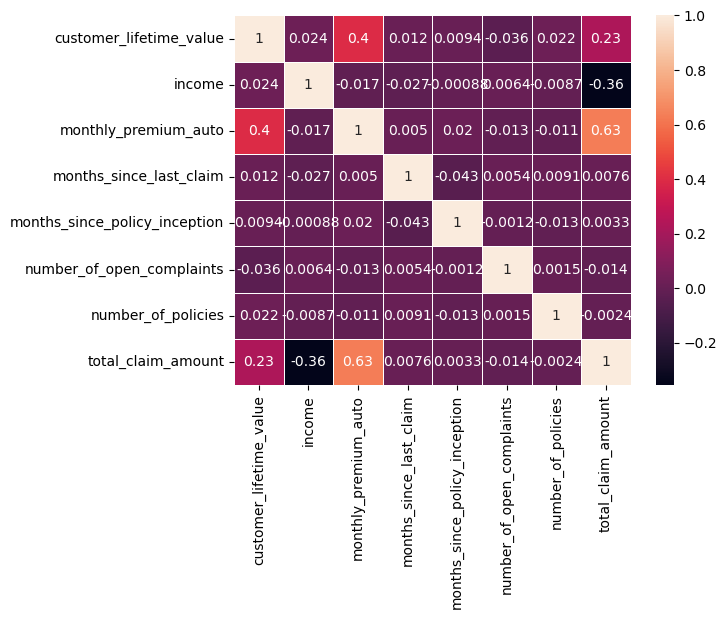

In [14]:
# heatmap

sns.heatmap(correlations_matrix,annot=True,linewidth=.5)
plt.show()

* The correlation matrix suggests that  there are is not a strong relationships between columns in general.
* The only columns in relation with the target (total_claim_amount) are: customer_lifetime_value, income, monthly_premium_auto.

In [15]:
# 9. Create a function to plot every discrete variable. 

def plot_disc(df):
    
    colm = df.columns
    for i in colm:
        sns.countplot(x=i, data=df)
        plt.show()
        

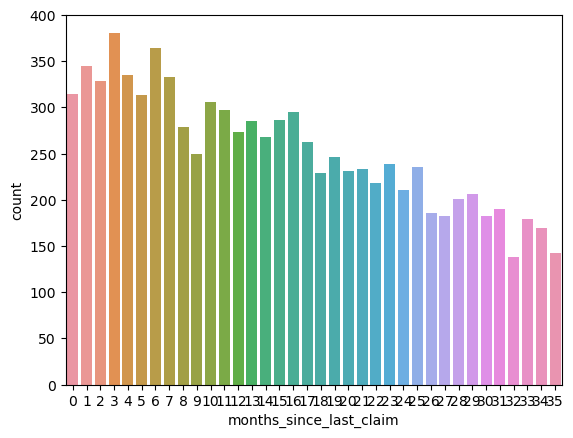

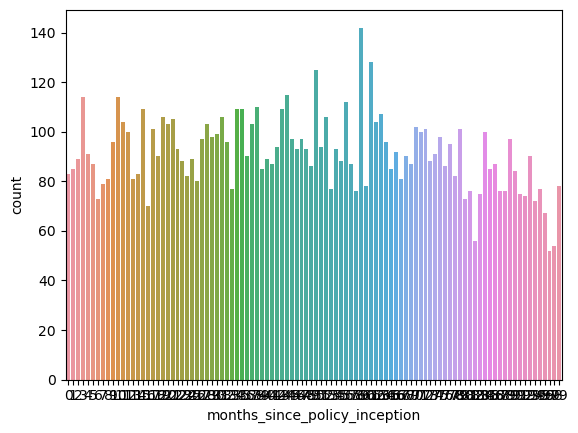

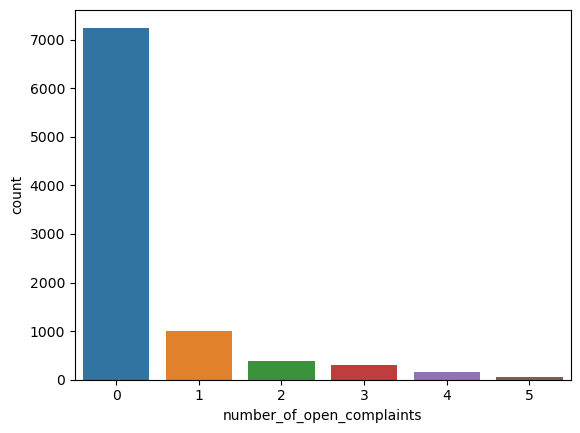

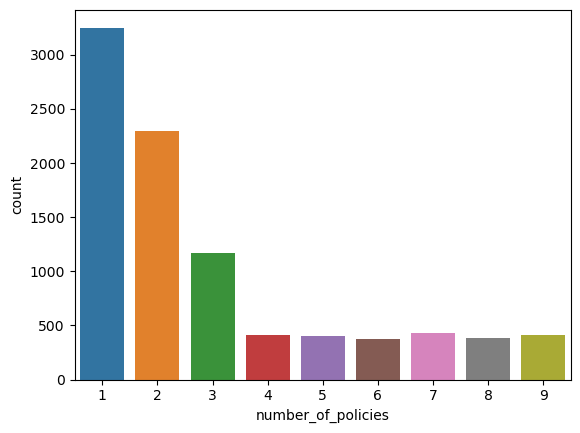

In [16]:
plot_disc(discrete_df) # function for plotting discrete_df

In [17]:
# Do the same with the continuous variables, 
# (be careful, you may need to change the plot type to one better suited for continuous data!)

def plot_cont(df):
    
    colm = df.columns
    for i in colm:
        sns.displot(x=i, data=df)
        plt.show()

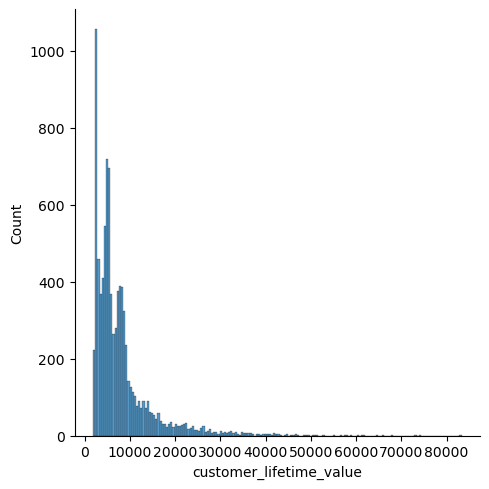

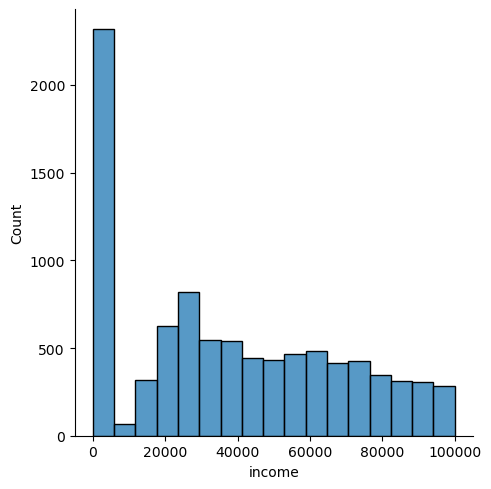

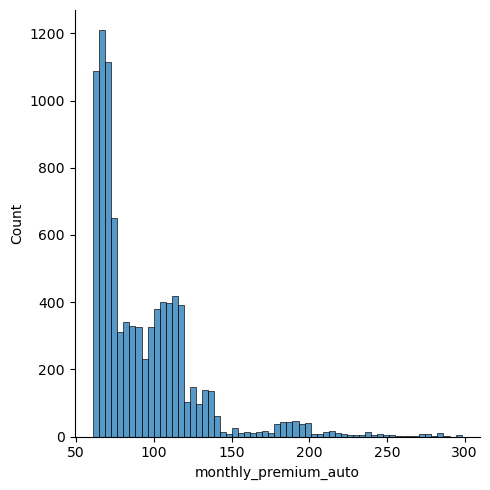

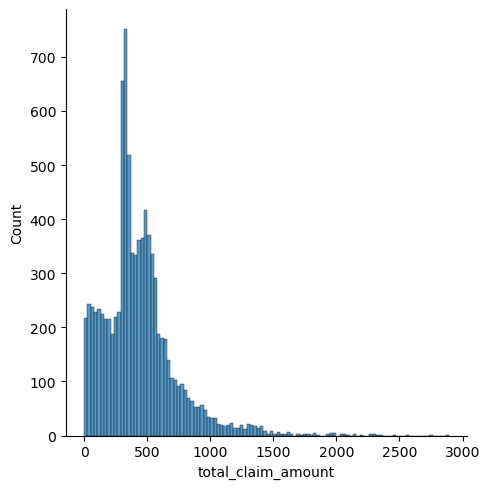

In [18]:
plot_cont(continuous_df) # function for plotting continuous_df

In [19]:
# 10. Comment what you can see in the plots.

# The displot for 'customer_lifetime_value' distribution is skewed to the left, suggesting presence of outliers.

# For income, except for the large number of observations with zero, the rest of the distribution seems pretty "normal".

# For monthly_premium_auto there seems to be also some observations that are well above the median values.

# From the displot for column "total_claim_amount" distribution looks as it could be bell-shaped.


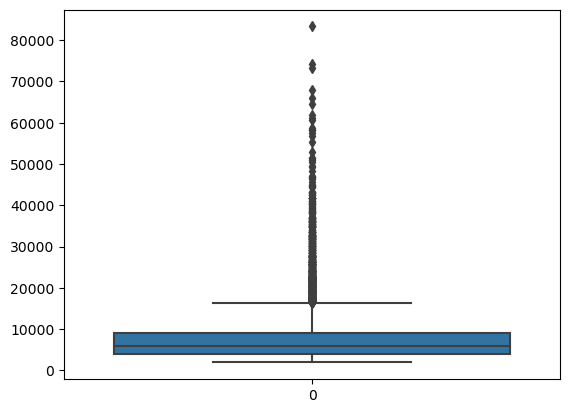

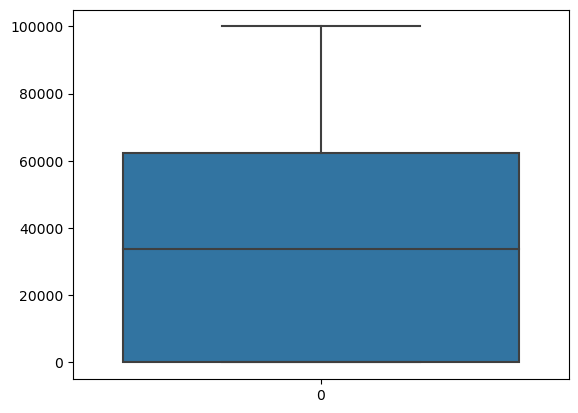

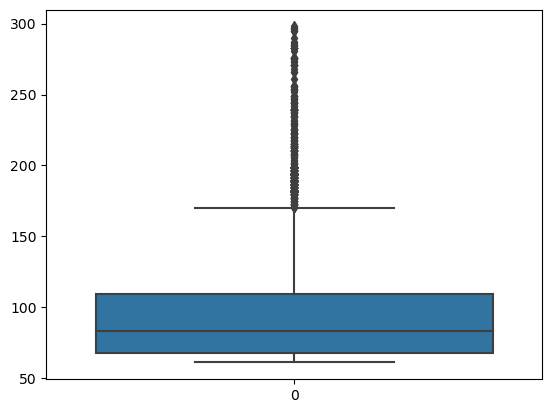

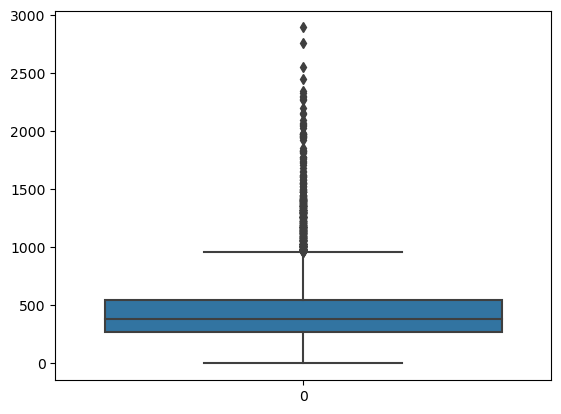

In [20]:
# 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

def plot_boxplot(df):
    
    colm = df.columns
    for i in colm:
        sns.boxplot(df[i])
        plt.show()
        
plot_boxplot(continuous_df)

In [21]:
# 12. Did you find outliers? Comment what you will do with them. 
# If you decide to remove them, do that now. Also, remove them from your main dataframe.

# Looks like there are outliers in columns: 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount'.

# I have decided to continue with those data values and later to check if removing these could have some impact 
# on the outcome of a potential model


In [22]:
# 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

customer.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [23]:
# 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

numerical_df.to_csv('numerical.csv', index=False)

| part B |
| --- | 

# Lab | Cleaning Categorical Data

In [24]:
# 1. Open the notebook created for Lab-cleaning-numerical-data.

In [25]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.

categorical_df = customer.select_dtypes(object)
display(categorical_df.head())
display(categorical_df.shape)
display(categorical_df.columns)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 15)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [26]:
# 3. Check for NaN values and decide what to do with them, do it now.

categorical_df.isna().sum() # No NaN values

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [27]:
# 4. Check all unique values of columns.

categorical_df.nunique() # number of total unique values per column

customer             9134
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

In [28]:
# total number of each unique values per column, including Na values.

for i in categorical_df.columns:
    if categorical_df[i].nunique(dropna=False) < 10:
        print(categorical_df[i].value_counts())
        print('-----')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----
No     7826
Yes    1308
Name: response, dtype: int64
-----
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
-----
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64
-----
F    4658
M    4476
Name: gender, dtype: int64
-----
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
-----
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
-----
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
-----
Personal L3     3426
Personal L2     2122
Personal

In [29]:
# 5. Check dtypes. Do they all make sense as categorical data?

print(categorical_df.value_counts(dropna=False).sum())
print(categorical_df.dtypes)

9134
customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object


* The column `customer` is a unique identifier for the customers, not of an interest at this point.

In [30]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

* Two columns, `policy` and `renew_offer_type` contains alpha and numeric data:

    a. column `policy` contains values like 'Corporate L3', 'Personal L3', 'Corporate L2', etc. The first part/string refers to the policy type, which is in direct relation with the column 'policy type'. So that can be droped and we can keep only the numbers (L1, L2, and L3). The letter L can be droped, too.

    b. column `renew_offer_type` contains values like 'Offer1', 'Offer3', 'Offer2', and 'Offer4'. The first part/string is the same for all entries. That means we can keep only the numbers (1, 2, 3, and 4).

In [31]:
# cleaning column 'policy'

display(categorical_df['policy'].value_counts(dropna=False))

clean_policy = []

for i in categorical_df['policy']:
    
    if 'L' in i:
        i = i.split('L')[1]
        clean_policy.append(i)
            
categorical_df['policy'] = clean_policy
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

3    4588
2    2881
1    1665
Name: policy, dtype: int64

In [32]:
# cleaning column 'renew_offer_type'

display(categorical_df['renew_offer_type'].value_counts(dropna=False))

clean_rot = []

for i in categorical_df['renew_offer_type']:
    
    if 'Offer' in i:
        i = i.replace('Offer','')
        clean_rot.append(i)
            
categorical_df['renew_offer_type'] = clean_rot
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

In [33]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it.

In [34]:
# wrangle values in column 'education', to shrink the categories from 5 to 3 unique values

# Bachelor + College = Undergraduate | High School or Below = High School or Below | # Master + Doctor = Postgraduate

display(categorical_df['education'].value_counts(dropna=False))

clean_edu = []

for i in categorical_df['education']:
    
    if 'Bachelor' in i:
        
        i = i.replace('Bachelor','Undergraduate')
        clean_edu.append(i)
        
    elif 'College' in i:
        
        i = i.replace('College','Undergraduate')
        clean_edu.append(i)
        
    elif 'Master' in i:
        
        i = i.replace('Master','Postgraduate')
        clean_edu.append(i)
        
    elif 'Doctor' in i:
                
        i = i.replace('Doctor','Postgraduate')
        clean_edu.append(i)
        
    else:
        
        i = i
        clean_edu.append(i)
            
categorical_df['renew_offer_type'] = clean_edu
categorical_df['renew_offer_type'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Undergraduate           5429
High School or Below    2622
Postgraduate            1083
Name: renew_offer_type, dtype: int64

In [35]:
# wrangle values in column 'employment_status', to shrink the categories from 5 to 3 unique values

# Medical Leave + Disabled + Retired = Other

display(categorical_df['employment_status'].value_counts(dropna=False))

clean_es = []

for i in categorical_df['employment_status']:
    
    if 'Medical Leave' in i:
        
        i = i.replace('Medical Leave','Other')
        clean_es.append(i)
        
    elif 'Disabled' in i:
        
        i = i.replace('Disabled','Other')
        clean_es.append(i)
        
    elif 'Retired' in i:
        
        i = i.replace('Retired','Other')
        clean_es.append(i)
        
    else:
        
        i = i
        clean_es.append(i)
            
categorical_df['employment_status'] = clean_es
categorical_df['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

Employed      5698
Unemployed    2317
Other         1119
Name: employment_status, dtype: int64

In [36]:
# wrangle values in column 'vehicle_class', to shrink the categories from 6 to 4 unique values

# Sports Car + Luxury SUV + Luxury Car = Luxury

display(categorical_df['vehicle_class'].value_counts(dropna=False))

clean_vc = []

for i in categorical_df['vehicle_class']:
    
    if 'Sports Car' in i:
        
        i = i.replace('Sports Car','Luxury')
        clean_vc.append(i)
        
    elif 'Luxury SUV' in i:
        
        i = i.replace('Luxury SUV','Luxury')
        clean_vc.append(i)
        
    elif 'Luxury Car' in i:
        
        i = i.replace('Luxury Car','Luxury')
        clean_vc.append(i)
        
    else:
        
        i = i
        clean_vc.append(i)
            
categorical_df['vehicle_class'] = clean_vc
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [37]:
# 8. Compare policy_type & policy. What information is contained in these columns? Can you identify what is important?

* As previously stated, column `policy` contains values like 'Corporate L3', 'Personal L3', 'Corporate L2', etc. The first part/string refers to the policy type, which is in direct relation with the column `policy type`.

In [38]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding?

for i in categorical_df.columns:
    if categorical_df[i].nunique(dropna=False) < 10:
        print(categorical_df[i].value_counts())
        print('-----')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----
No     7826
Yes    1308
Name: response, dtype: int64
-----
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
-----
Employed      5698
Unemployed    2317
Other         1119
Name: employment_status, dtype: int64
-----
F    4658
M    4476
Name: gender, dtype: int64
-----
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
-----
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
-----
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
-----
3    4588
2    2881
1    1665
Name: policy, dtype: int64
-----
Undergraduate           5429
High School

In [39]:
# type-o correction on value 'Medsize' in column 'vehicle_size' 'Midsize'

# Medsize = Midsize

display(categorical_df['vehicle_size'].value_counts(dropna=False))

clean_vs = []

for i in categorical_df['vehicle_size']:
    
    if 'Medsize' in i:
        
        i = i.replace('Medsize','Midsize')
        clean_vs.append(i)
                
    else:
        
        i = i
        clean_vs.append(i)
            
categorical_df['vehicle_size'] = clean_vs
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

Midsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [40]:
# Comment your thoughts and make those changes.

# I believe this is all I can doso far...

In [41]:
# 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

categorical_df.to_csv('catagorical.csv', index=False)
categorical_df

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,Undergraduate,Agent,Two-Door Car,Midsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,Undergraduate,Agent,Four-Door Car,Midsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,Undergraduate,Agent,Two-Door Car,Midsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,Undergraduate,Call Center,SUV,Midsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,Undergraduate,Agent,Four-Door Car,Midsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,Undergraduate,Web,Four-Door Car,Midsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,Undergraduate,Branch,Four-Door Car,Midsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,Undergraduate,Branch,Four-Door Car,Midsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,Undergraduate,Branch,Four-Door Car,Large
